In [4]:
import sys
from os.path import join
import numpy as np
import importlib
import pandas as pd
from glob import glob
import importlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
PROJ_DIR = '/home/gcgreen2/alignment'
GITDIR = join(PROJ_DIR, 'SequenceAlignmentAndSketching')
DATASETS = 'gc0.2  gc0.2_del3.16  gc0.2_ins8.04  gc0.2_ins8.04_del3.16  gc0.2_sub1.68  gc0.2_sub1.68_ins8.04_del3.16  nctc1080  unif  gc0.2_sub25  gc0.2_sub50'
DATASETS = DATASETS.split()
gt_path = lambda dset: join(GITDIR, 'data', dset, 'ground_truth.txt')
fasta_path = lambda dset: join(GITDIR, 'data', dset, 'reads.fasta')
# FASTA_DIR = join(PROJ_DIR, 'spectral_jaccard_similarity/filtered_fasta')
# DATASETS = np.loadtxt(join(PROJ_DIR,'NCTC_list.txt'), dtype=str)

In [14]:
ALN_DIR_MH = join(PROJ_DIR, 'out','4-25-mh')
pred_path_mh = lambda dset: join(ALN_DIR_MH, dset+'_aln.tsv')
ALN_DIR_SH2 = join(PROJ_DIR, 'out','5-9-sh-2')
pred_path_sh2 = lambda dset: join(ALN_DIR_SH2, dset+'_aln.tsv')
ALN_DIR_SH1 = join(PROJ_DIR, 'out','5-9-sh-1')
pred_path_sh1 = lambda dset: join(ALN_DIR_SH1, dset+'_aln.tsv')

In [32]:
importlib.reload(mu)

<module 'metric_utils' from '/home/gcgreen2/alignment/SequenceAlignmentAndSketching/utils/metric_utils.py'>

In [8]:
sys.path.append(join(GITDIR,'utils'))
import metric_utils as mu, seq_utils as su

## look at overlap estimates

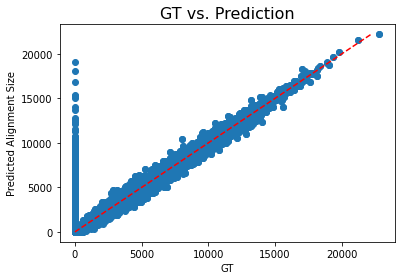

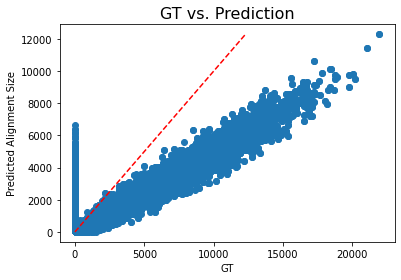

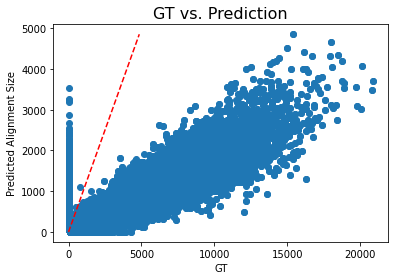

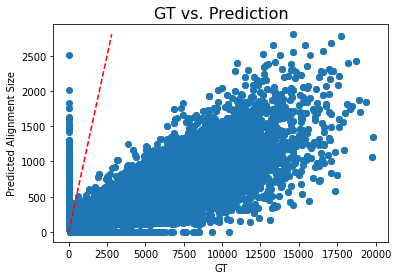

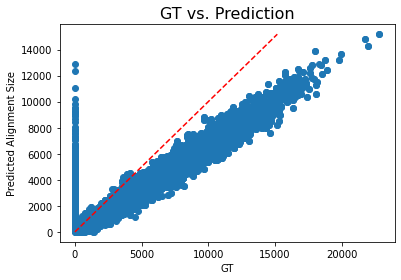

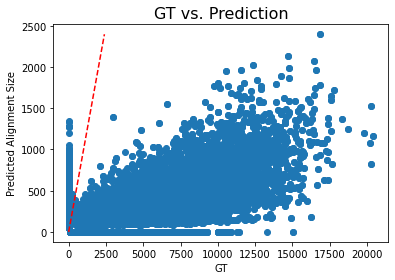

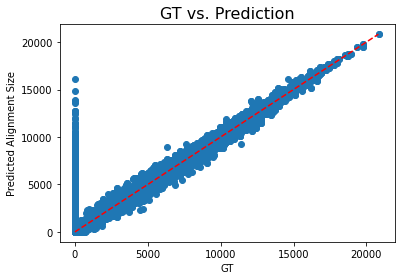

KeyboardInterrupt: 

In [10]:
for dset in DATASETS:
    pred_df = pd.read_csv(pred_path_mh(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])
    gt_df = pd.read_csv(gt_path(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
#     pred_df, gt_df = mu.load_dfs(pred_path(dset), gt_path(dset))
    overlaps = mu.get_overlaps(pred_df, gt_df)

    plt.figure()
    plt.plot(overlaps[:,0],overlaps[:,1],'o')
    plt.plot([0,overlaps[:,1].max()], [0,overlaps[:,1].max()], '--', color='red')
    plt.title(f'GT vs. Prediction ({dset})',fontsize=16)
    plt.xlabel('GT')
    plt.ylabel('Predicted Alignment Size')
    plt.pause(0.01)

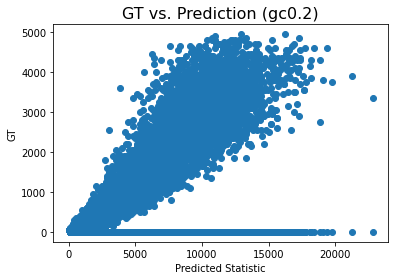

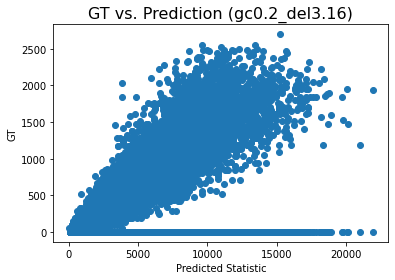

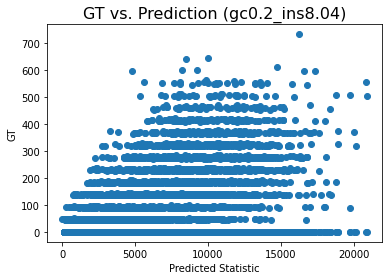

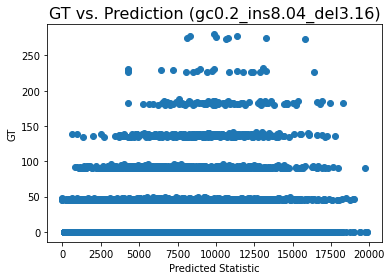

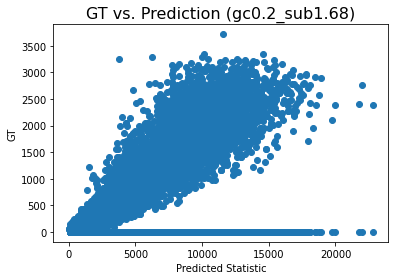

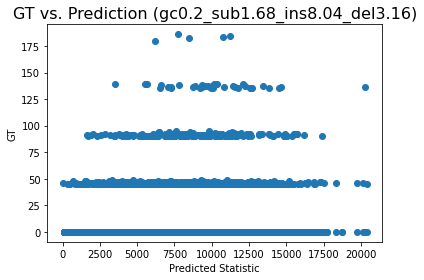

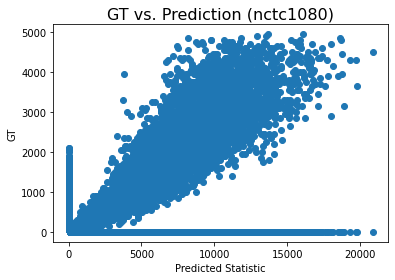

FileNotFoundError: [Errno 2] No such file or directory: '/home/gcgreen2/alignment/out/5-9-sh-2/unif_aln.tsv'

In [16]:
for dset in DATASETS:
    pred_df = pd.read_csv(pred_path_sh2(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])
    gt_df = pd.read_csv(gt_path(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
#     pred_df, gt_df = mu.load_dfs(pred_path(dset), gt_path(dset))
    overlaps = mu.get_overlaps(pred_df, gt_df)

    plt.figure()
    plt.plot(overlaps[:,0],overlaps[:,1],'o')
    plt.title(f'GT vs. Prediction ({dset})',fontsize=16)
    plt.ylabel('GT')
    plt.xlabel('Predicted Statistic')
    plt.pause(0.01)

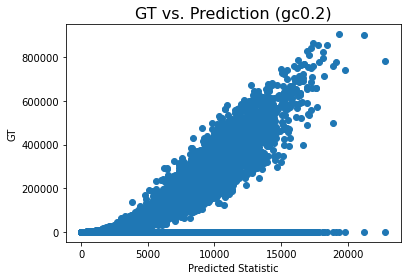

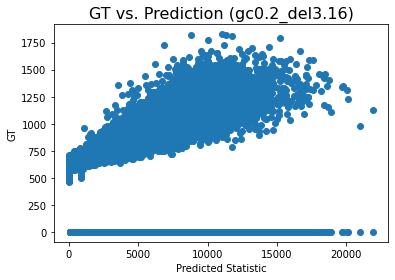

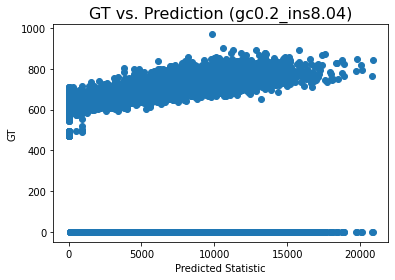

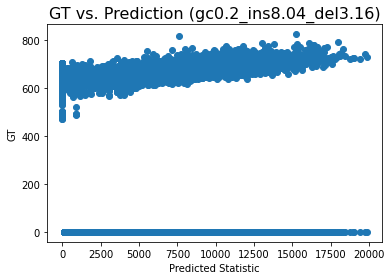

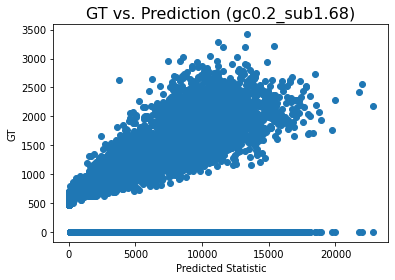

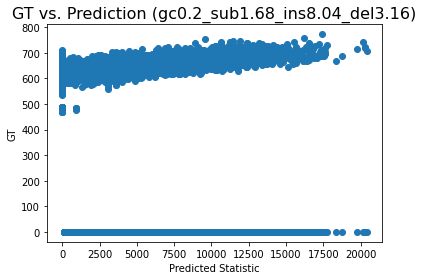

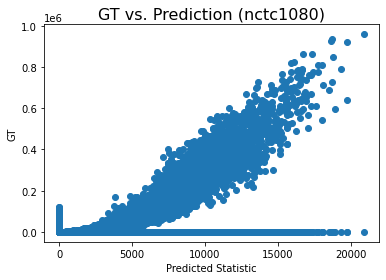

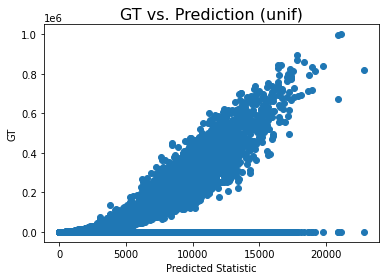

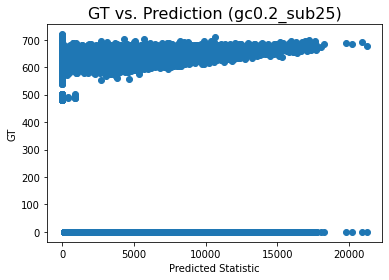

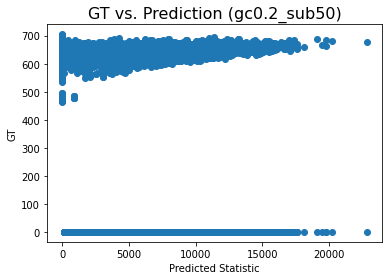

In [17]:
for dset in DATASETS:
    pred_df = pd.read_csv(pred_path_sh1(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])
    gt_df = pd.read_csv(gt_path(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
#     pred_df, gt_df = mu.load_dfs(pred_path(dset), gt_path(dset))
    overlaps = mu.get_overlaps(pred_df, gt_df)

    plt.figure()
    plt.plot(overlaps[:,0],overlaps[:,1],'o')
    plt.title(f'GT vs. Prediction ({dset})',fontsize=16)
    plt.ylabel('GT')
    plt.xlabel('Predicted Statistic')
    plt.pause(0.01)

(array([ 4.,  0., 41.,  0.,  0., 33.,  0., 16.,  0.,  6.]),
 array([5. , 5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 10 artists>)

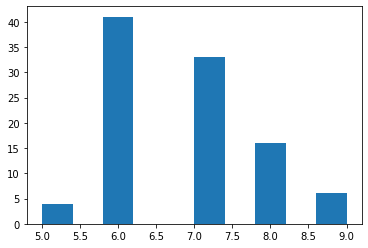

In [36]:
plt.hist([9, 6, 8, 6, 8, 7, 7, 6, 7, 8, 6, 5, 6, 7, 7, 6, 6, 7, 7, 6, 6, 7, 8, 7, 8, 7, 6, 7, 7, 5, 6, 8, 6, 7, 6, 6, 6, 7, 6, 9, 6, 6, 8, 8, 7, 6, 6, 8, 6, 9, 7, 7, 7, 8, 8, 6, 7, 7, 6, 7, 7, 7, 6, 5, 6, 5, 6, 8, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 7, 9, 7, 6, 7, 6, 8, 7, 8, 9, 7, 7, 6, 7, 7, 7, 9, 8, 8, 6, 6])

(array([34.,  0.,  0., 46.,  0.,  0., 18.,  0.,  0.,  2.]),
 array([5. , 5.3, 5.6, 5.9, 6.2, 6.5, 6.8, 7.1, 7.4, 7.7, 8. ]),
 <BarContainer object of 10 artists>)

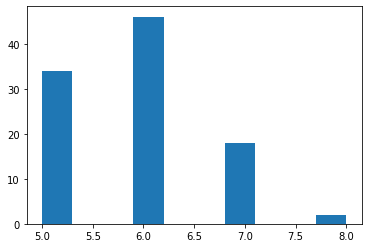

In [37]:
plt.hist([7, 5, 6, 8, 7, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 7, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 7, 6, 6, 6, 5, 7, 7, 5, 7, 6, 6, 6, 7, 7, 7, 6, 7, 7, 5, 6, 6, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 7, 5])

In [19]:
def func(array):
    return sum([x for x in array if x>10])

In [23]:
from ast import literal_eval

In [24]:
for dset in DATASETS:
    pred_df = pd.read_csv(pred_path_sh1(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])
    for i in range(len(pred_df)):
        pred_df.loc[i,'overlap'] = func(literal_eval(pred_df.loc[i,'array']))
    gt_df = pd.read_csv(gt_path(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2'])
#     pred_df, gt_df = mu.load_dfs(pred_path(dset), gt_path(dset))
    overlaps = mu.get_overlaps(pred_df, gt_df)

    plt.figure()
    plt.plot(overlaps[:,0],overlaps[:,1],'o')
    plt.title(f'GT vs. Prediction ({dset})',fontsize=16)
    plt.ylabel('GT')
    plt.xlabel('Predicted Statistic')
    plt.pause(0.01)

KeyboardInterrupt: 

In [31]:
dset = 'gc0.2_ins8.04_del3.16'
pred_df = pd.read_csv(pred_path_sh1(dset), sep='\t', header=None, names=['i1','i2','overlap','l1','l2','array'])

(array([ 9., 48., 27.,  7.,  4.,  2.,  2.,  0.,  0.,  1.]),
 array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]),
 <BarContainer object of 10 artists>)

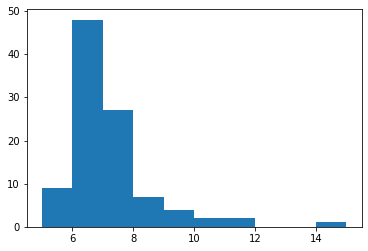

In [34]:
plt.hist(literal_eval(pred_df.iloc[0,5]))

(array([21.,  0., 44.,  0.,  0., 25.,  0.,  9.,  0.,  1.]),
 array([5. , 5.4, 5.8, 6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <BarContainer object of 10 artists>)

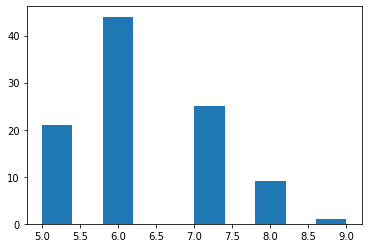

In [35]:
plt.hist(literal_eval(pred_df.iloc[10,5]))

# AUROC

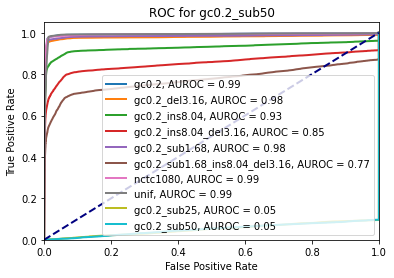

In [35]:
# for dset in DATASETS[1:]:
mu.roc([pred_path(dset) for dset in DATASETS], [gt_path(dset) for dset in DATASETS], DATASETS)

# ####################################

# ####################################

# ####################################

In [17]:
gt_df, pred_df = mu.load_dfs(DATASETS[0])
gt_df.head(2)

,i1,i2,overlap,l1,l2
0,1,23,3395.0,8066,7885
1,1,116,5066.0,8066,22131


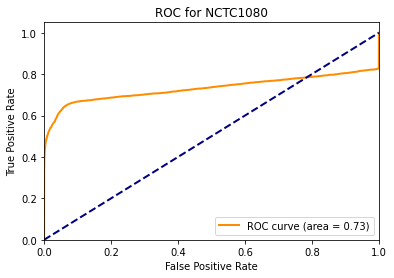

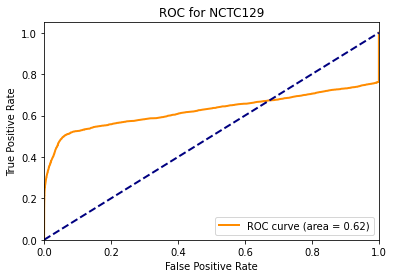

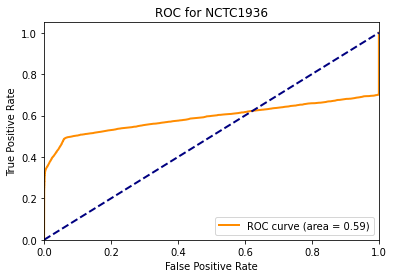

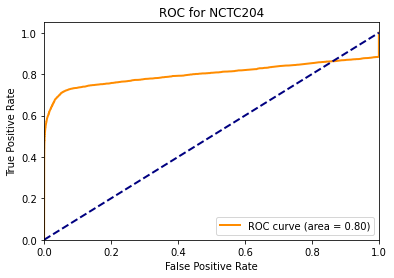

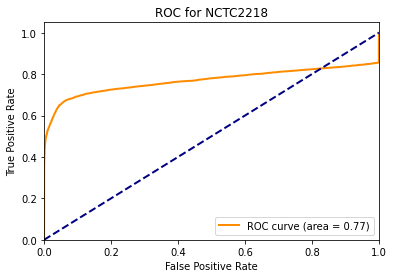

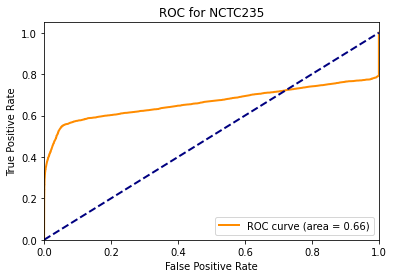

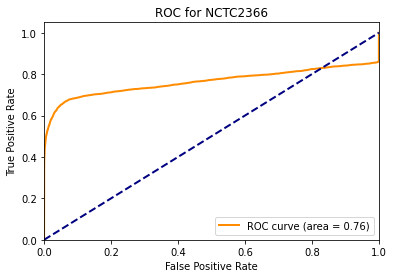

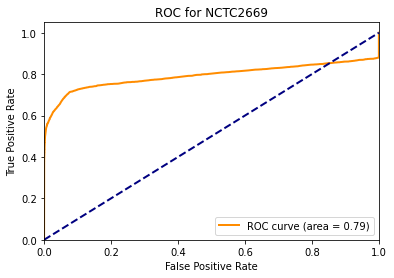

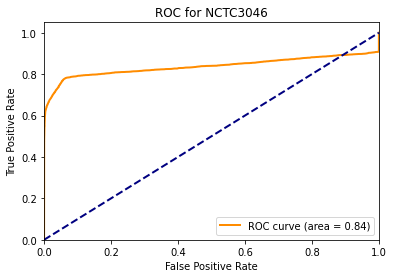

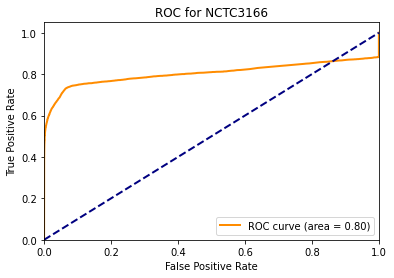

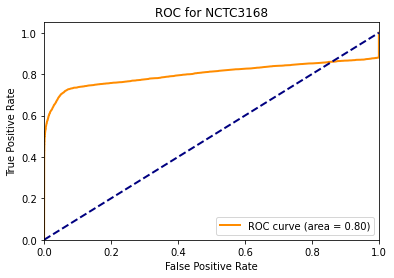

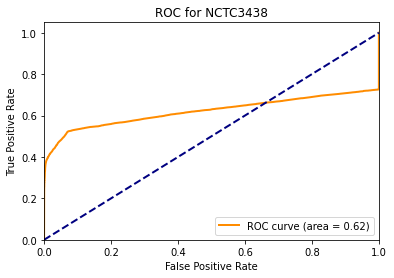

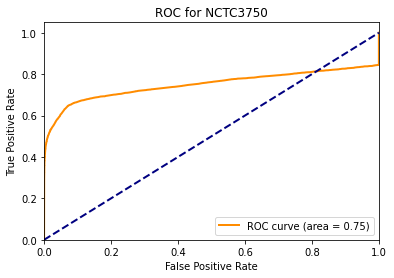

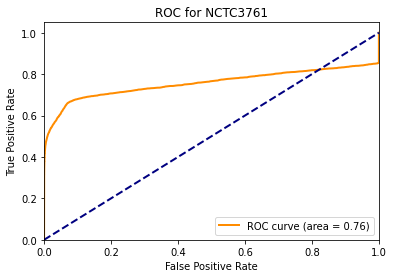

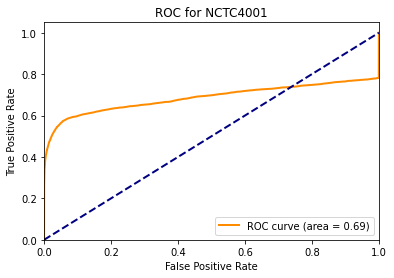

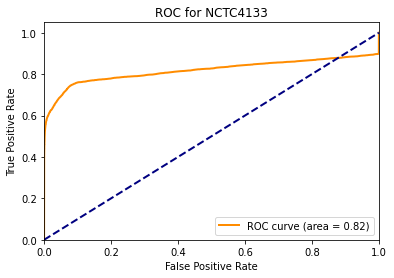

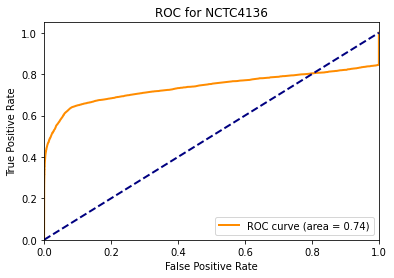

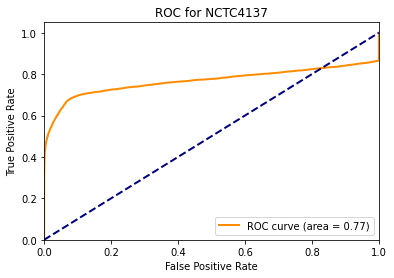

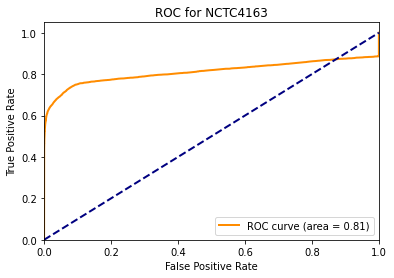

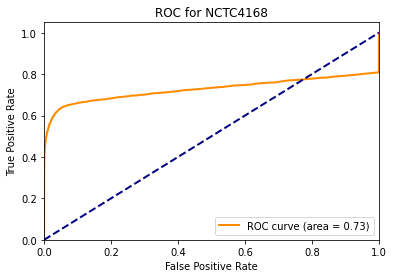

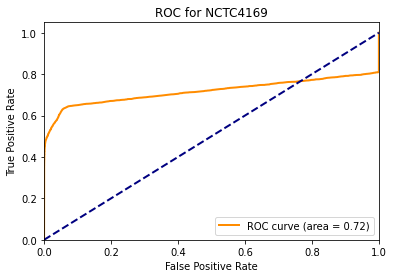

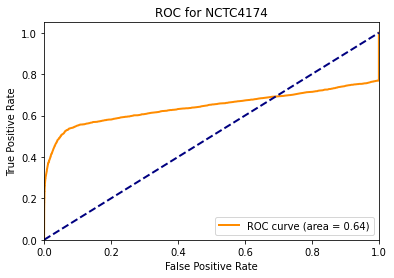

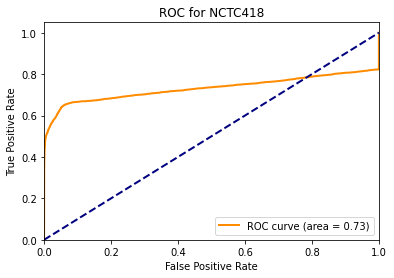

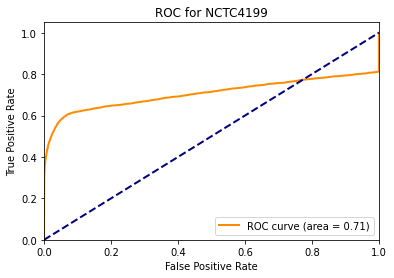

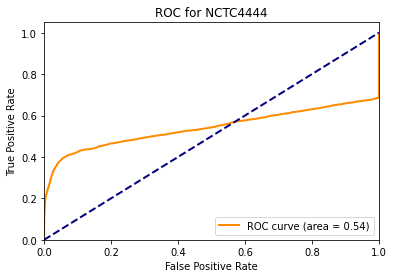

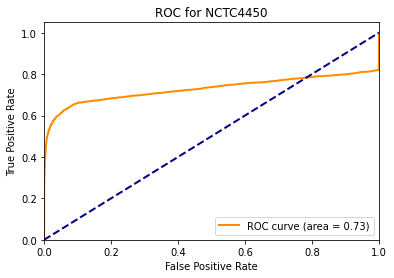

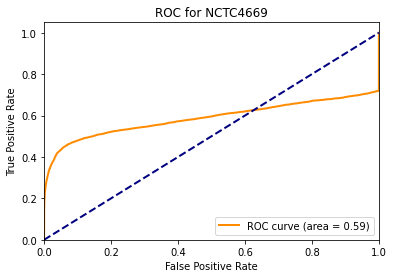

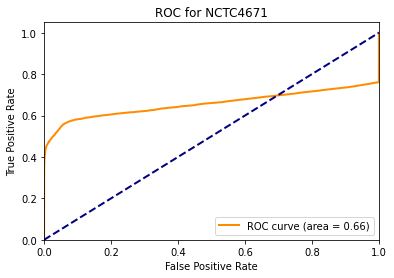

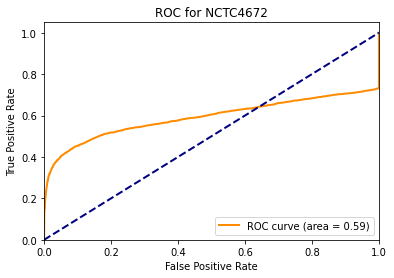

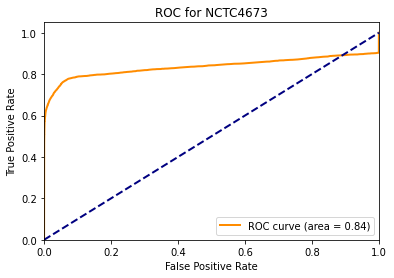

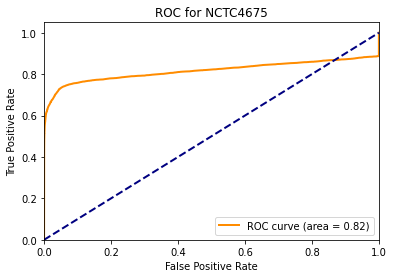

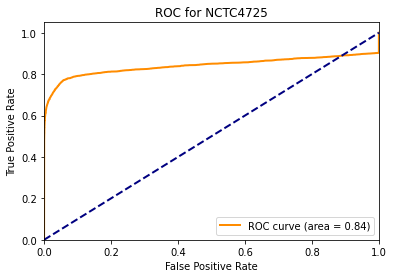

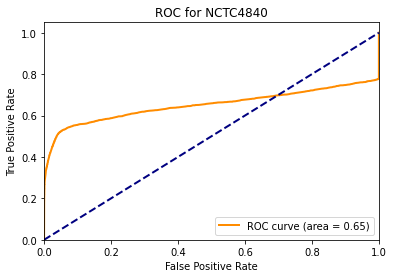

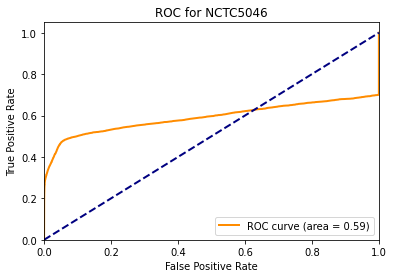

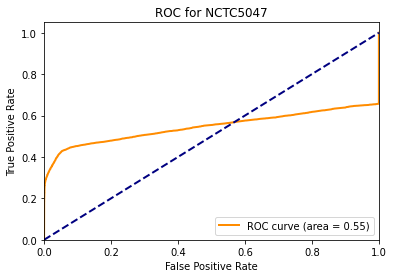

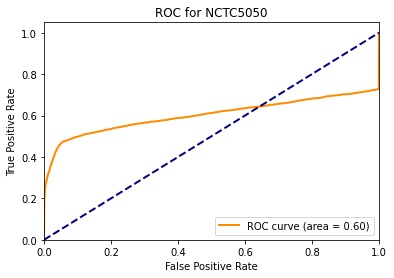

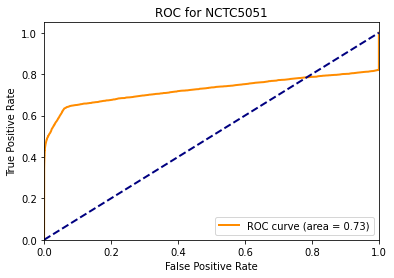

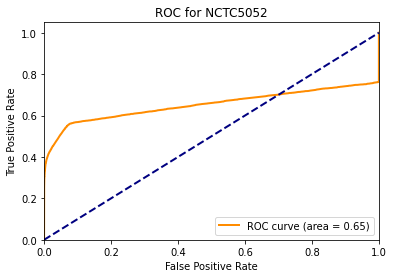

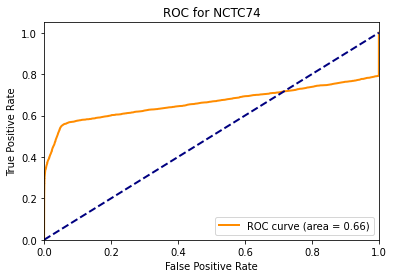

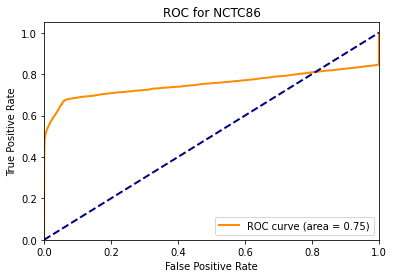

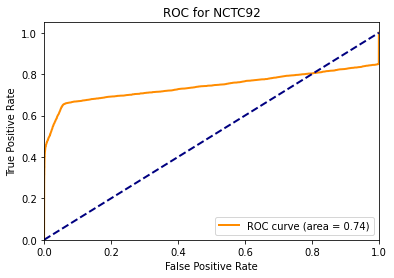

In [44]:
for dataset in DATASETS:
    mu.roc(dataset,PRED_DIRS[0])
    plt.pause(0.01)

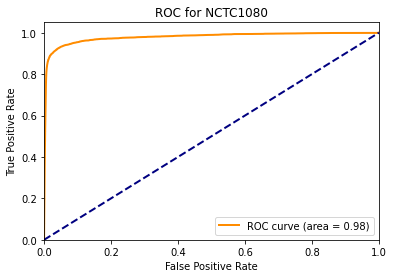

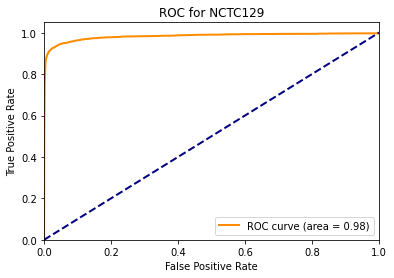

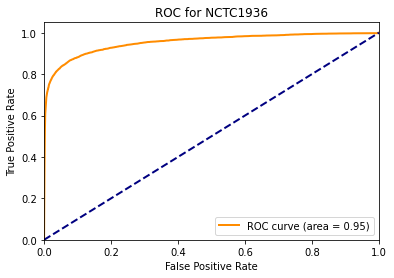

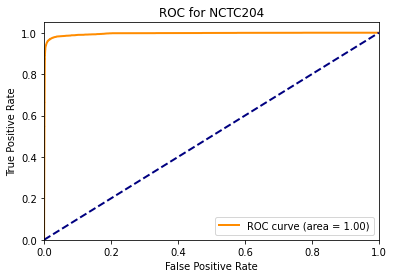

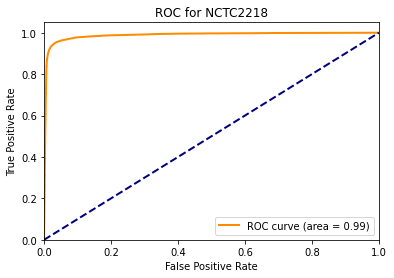

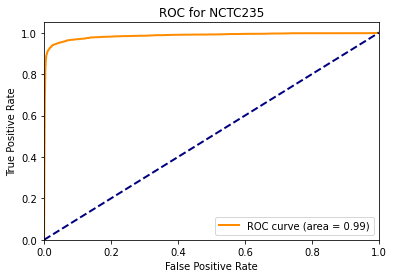

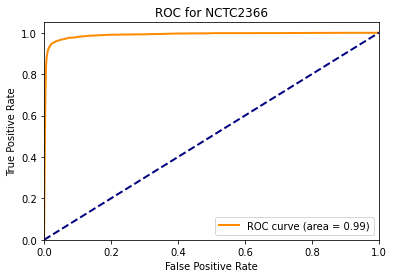

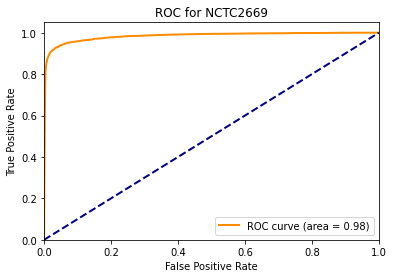

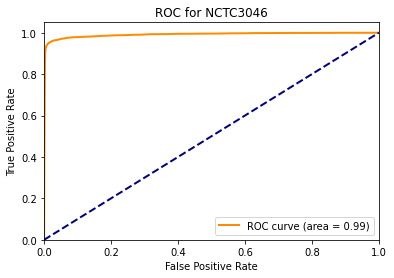

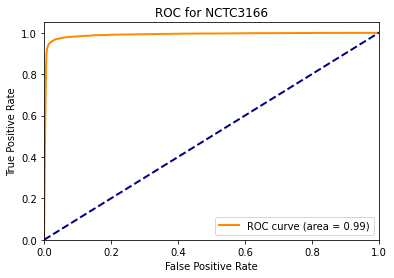

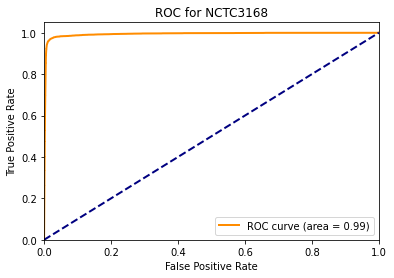

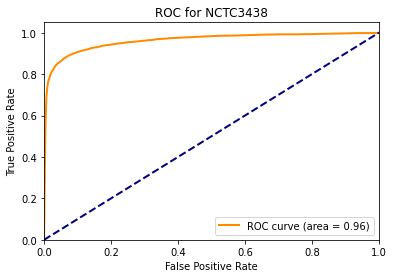

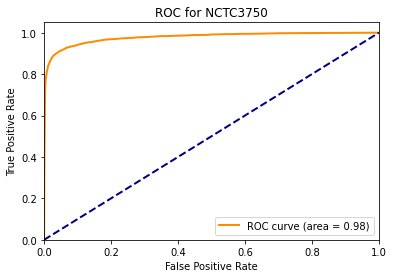

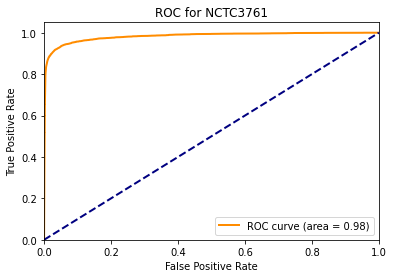

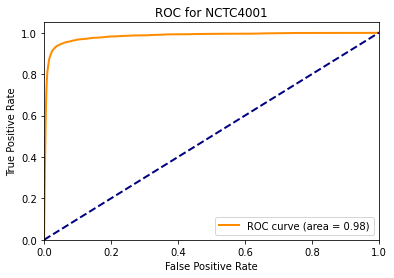

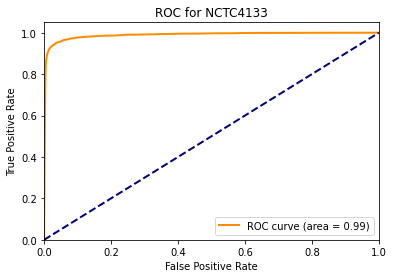

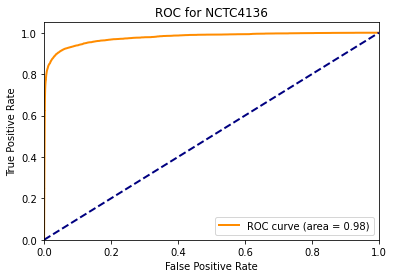

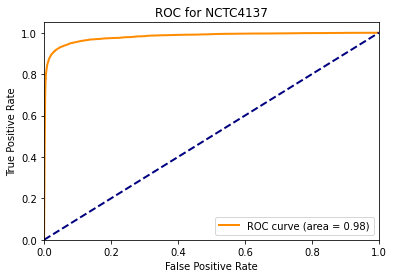

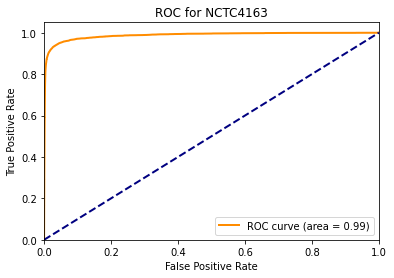

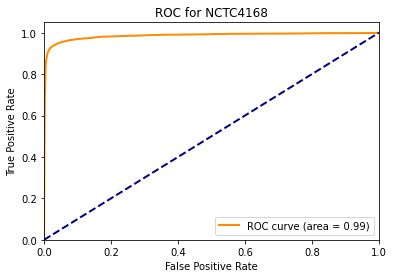

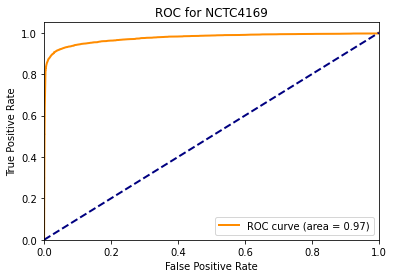

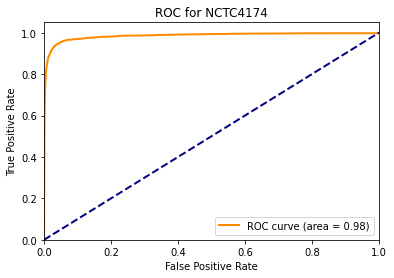

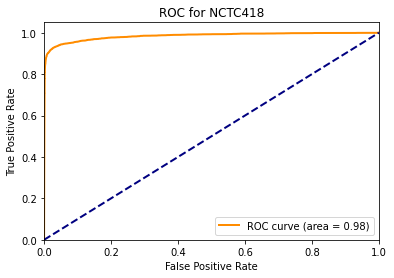

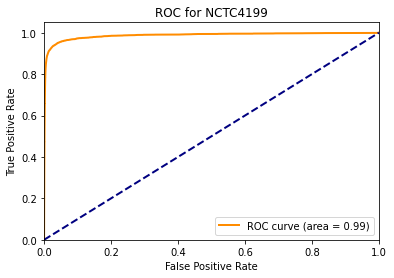

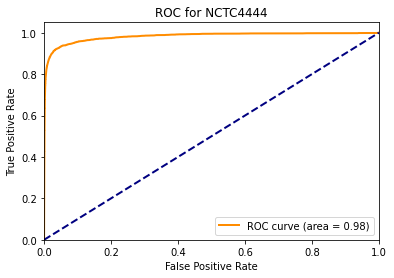

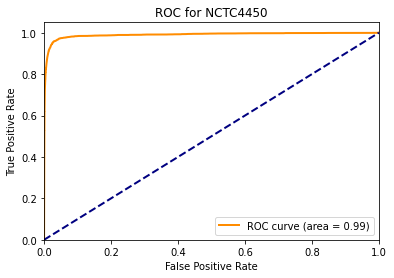

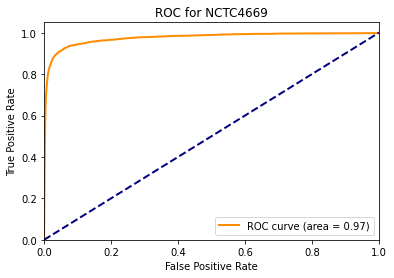

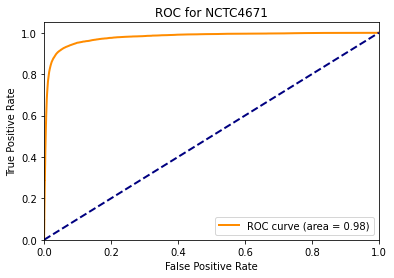

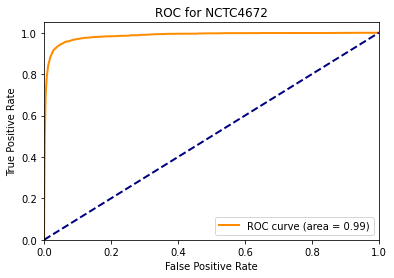

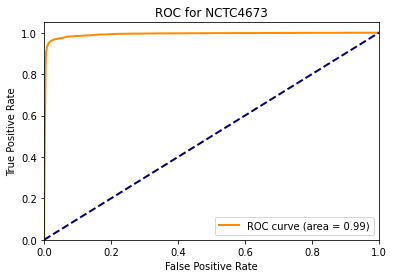

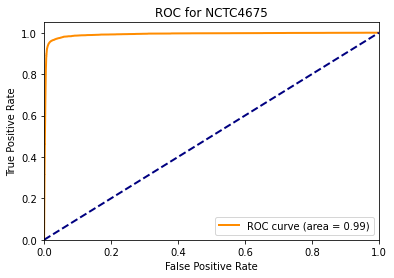

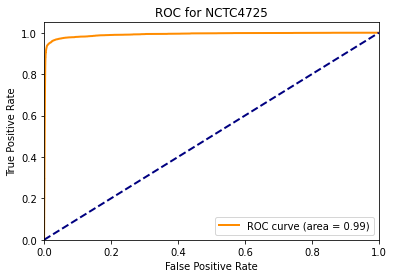

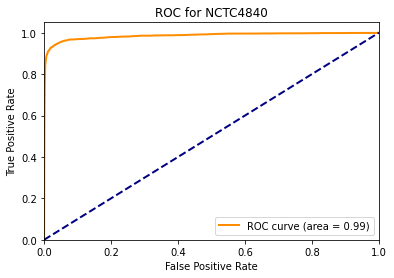

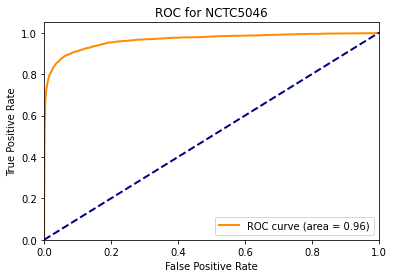

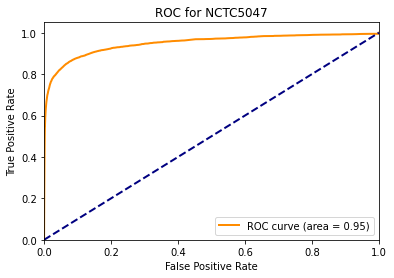

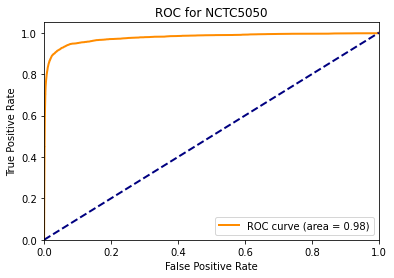

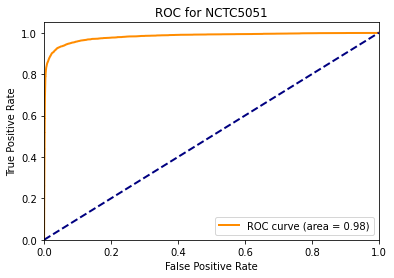

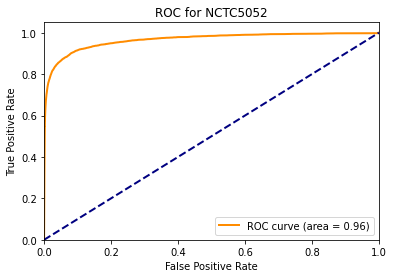

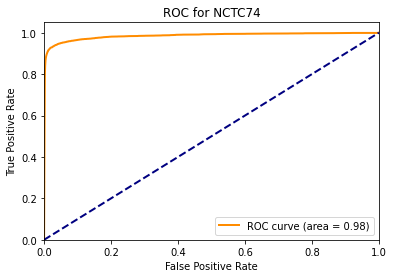

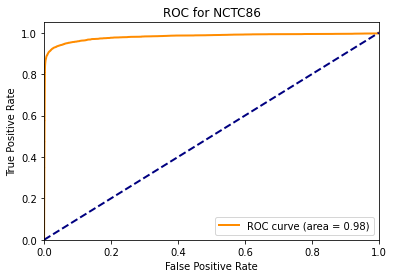

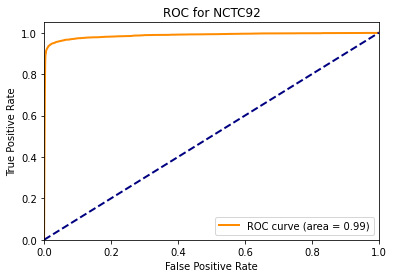

In [46]:
for dataset in DATASETS:
    mu.roc(dataset,PRED_DIRS[1])
    plt.pause(0.01)

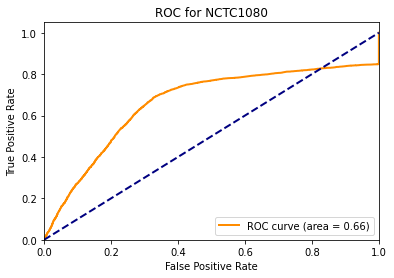

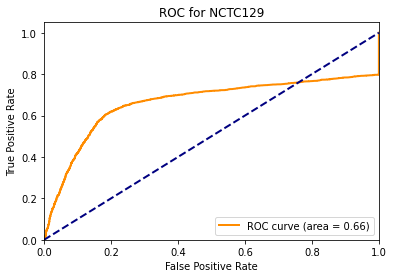

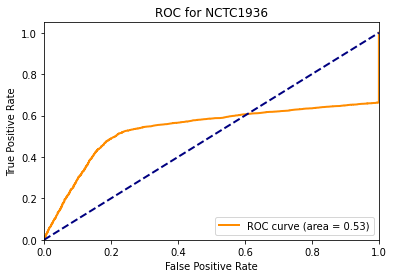

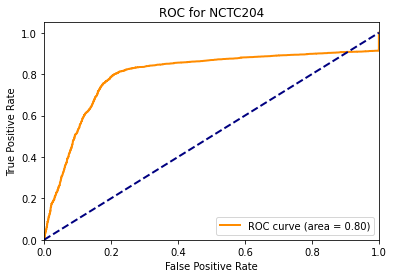

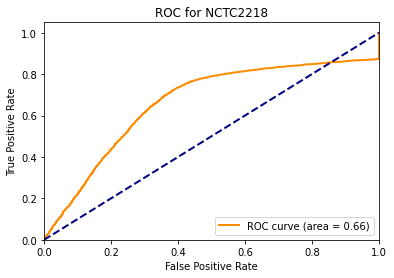

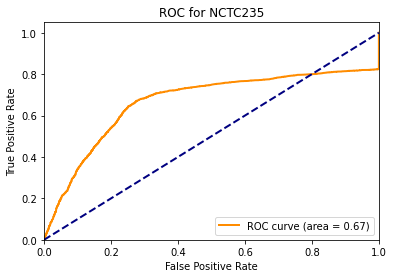

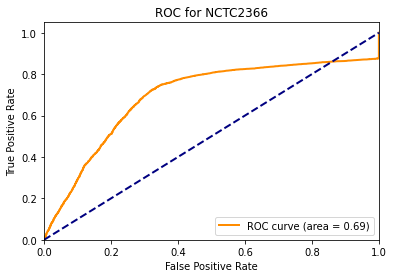

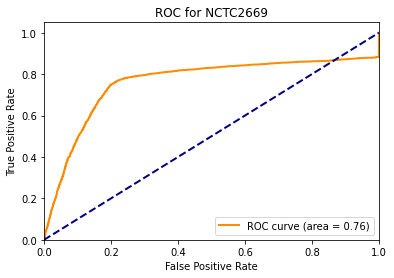

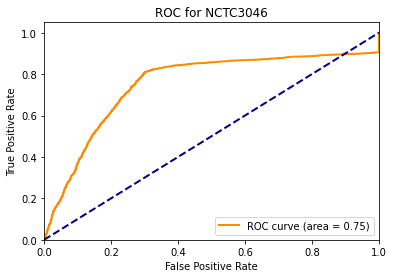

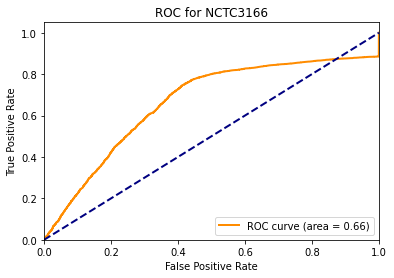

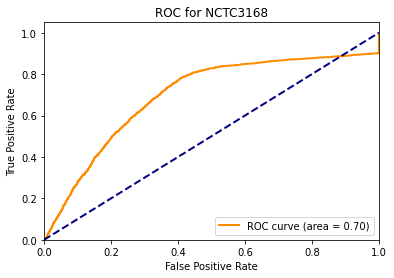

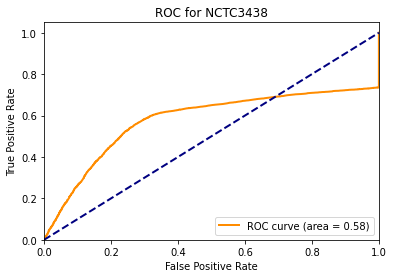

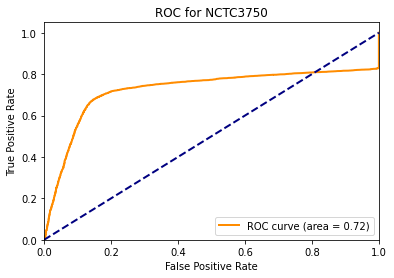

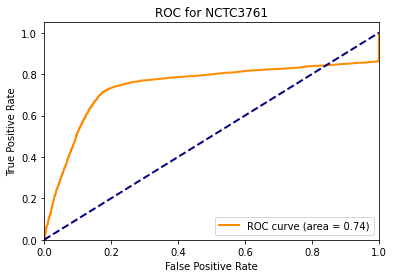

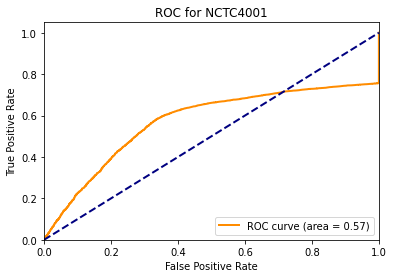

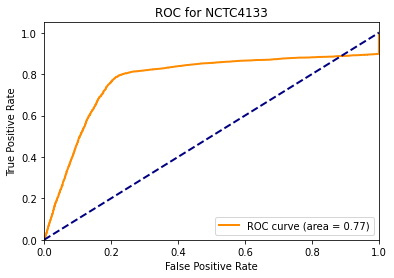

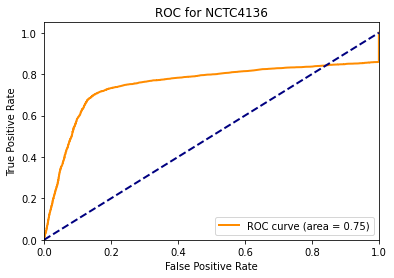

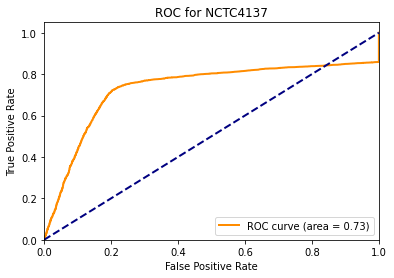

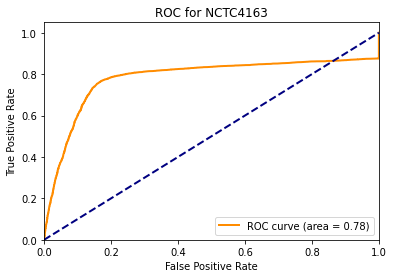

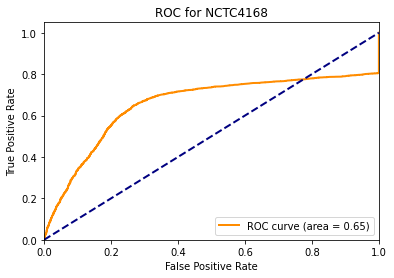

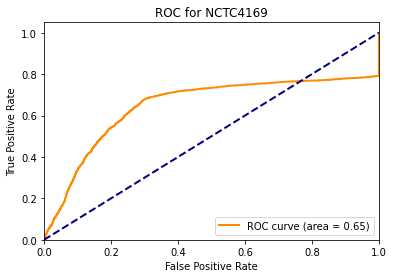

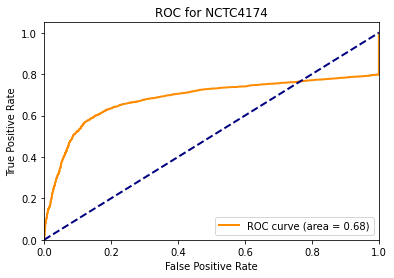

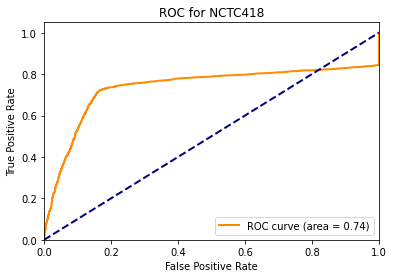

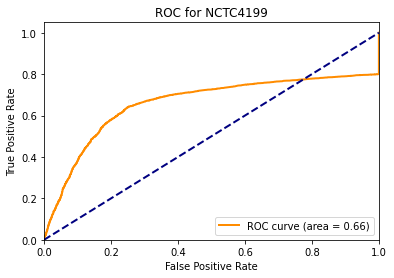

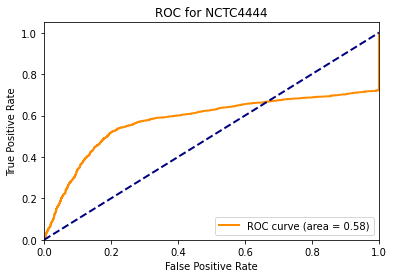

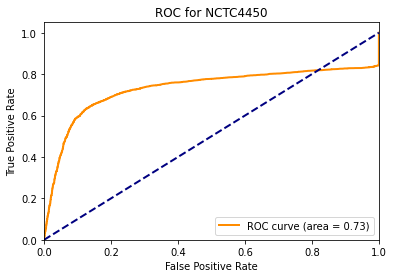

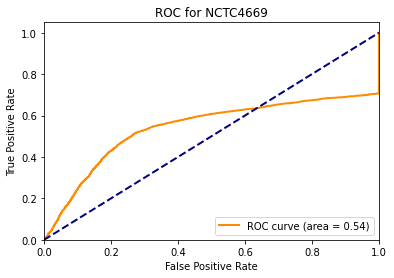

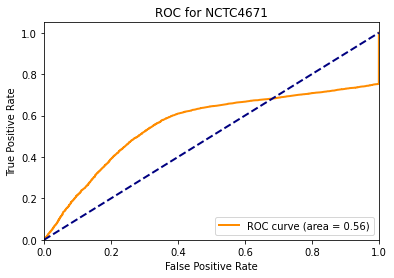

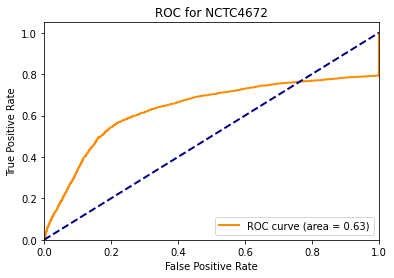

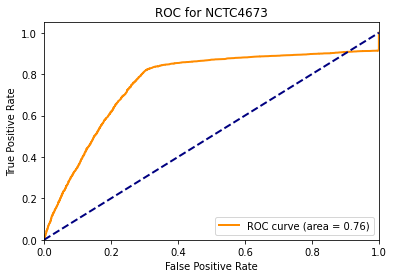

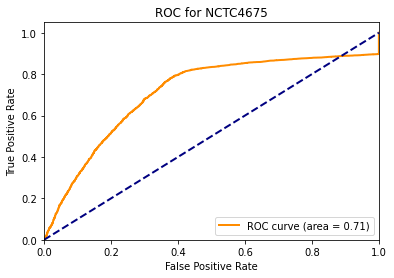

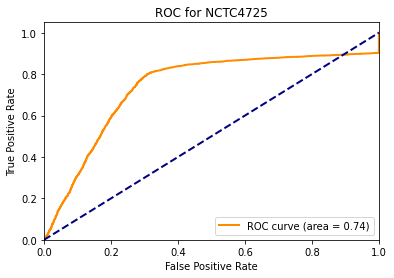

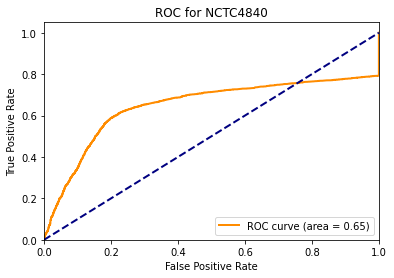

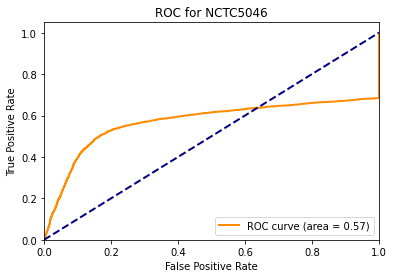

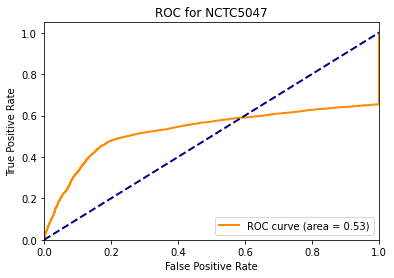

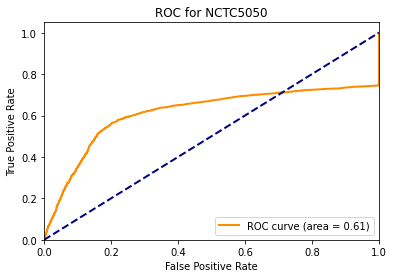

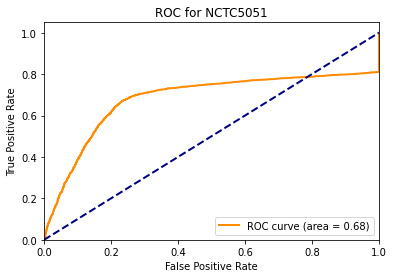

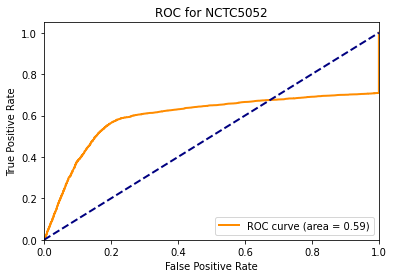

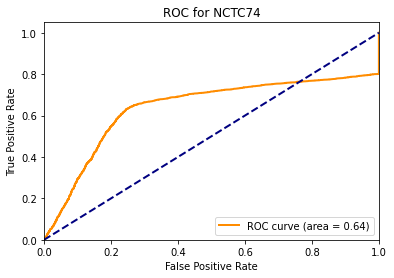

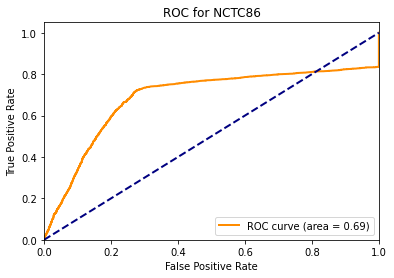

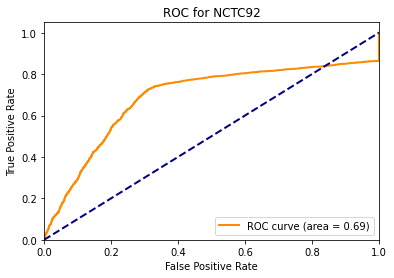

In [48]:
for dataset in DATASETS:
    mu.roc(dataset,PRED_DIRS[2])
    plt.pause(0.01)

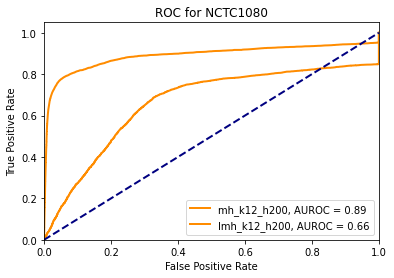

In [ ]:
for dataset in DATASETS:
    mu.roc(dataset,PRED_DIR,['mh_k12_h200','lmh_k12_h200'])
    plt.pause(0.01)